Datos Rayos X

Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Carga Datos

In [7]:
actividad1=pd.read_csv("Actividad 1.csv",sep=',',encoding='utf-8').drop([0,1])
actividad1=actividad1.apply(pd.to_numeric)
actividad2ambiente=pd.read_csv('Actividad 2 ambiente.csv',sep=',',encoding='utf-8').drop(0)
actividad2ambiente=actividad2ambiente.apply(pd.to_numeric)
actividad2Al0_02=pd.read_csv('Actividad 2 Al 0.02mm.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_02=actividad2Al0_02.apply(pd.to_numeric)
actividad2Al0_04=pd.read_csv('Actividad 2 Al 0.04.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_04=actividad2Al0_04.apply(pd.to_numeric)
actividad2Al0_06=pd.read_csv('Actividad 2 Al 0.06.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_06=actividad2Al0_06.apply(pd.to_numeric)
actividad2Al0_08=pd.read_csv('Actividad 2 Al 0.08.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_08=actividad2Al0_08.apply(pd.to_numeric)
actividad2Zn0_025=pd.read_csv('Actividad 2 Zn 0.025.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_025=actividad2Zn0_025.apply(pd.to_numeric)
actividad2Zn0_05=pd.read_csv('Actividad 2 Zn 0.05.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_05=actividad2Zn0_05.apply(pd.to_numeric)
actividad2Zn0_075=pd.read_csv('Actividad 2 Zn 0.075.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_075=actividad2Zn0_075.apply(pd.to_numeric)
actividad2Zn0_1=pd.read_csv('Actividad 2 Zn 0.1.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_1=actividad2Zn0_1.apply(pd.to_numeric)
actividad4=pd.read_csv("Actividad 4.csv",sep=';',encoding='utf-8').drop([0,1])
actividad4=actividad4.apply(pd.to_numeric)

Actividad 1

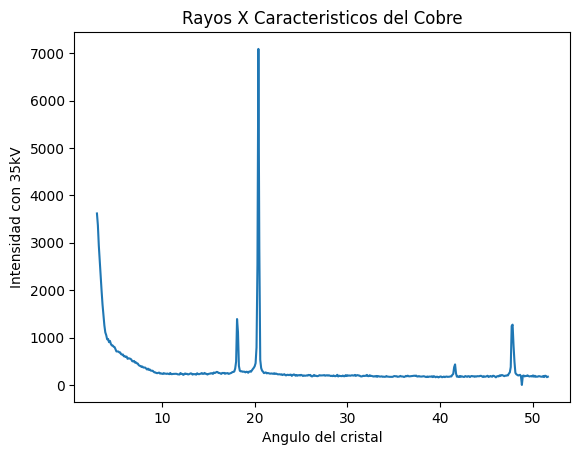

In [4]:
plt.plot(actividad1["Ángulo del crista"],actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Angulo del cristal')
plt.ylabel('Intensidad con 35kV')
plt.show()

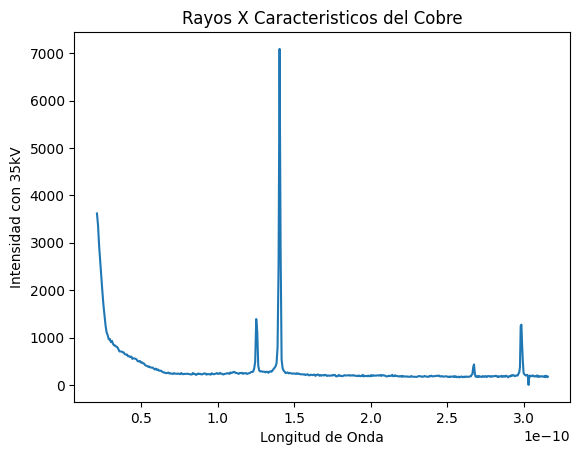

In [5]:
def ley_de_bragg(theta):
    d=2.014*10**(-10) #GUIA
    n=1 #ARBITRARIO
    lambda1=(2*d*np.sin(np.deg2rad(theta)))/n
    return lambda1
longitudes_de_onda=ley_de_bragg(actividad1['Ángulo del crista'])
plt.plot(longitudes_de_onda,actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.show()

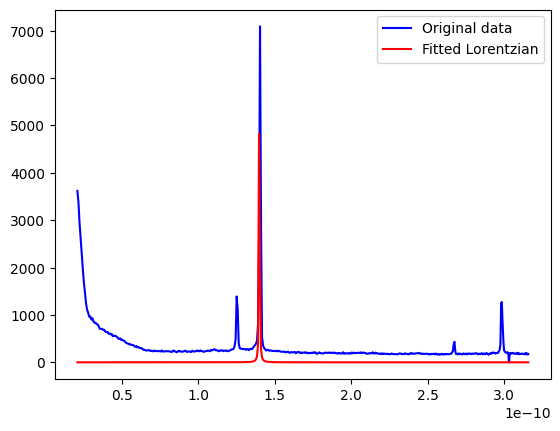

In [6]:
#Lorentziana
def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2))


picoKa=np.max(actividad1['Tasa con 35kV'])
x0 =1.4*10**(-10)
def fit_lorentzian(x, gamma):
    return lorentzian(x, picoKa, x0, gamma)

# Ajuste con curve_fit
initial_guess = [10**(-13)]  # Valor inicial para gamma
params, covariance = curve_fit(fit_lorentzian, longitudes_de_onda, actividad1['Tasa con 35kV'], p0=initial_guess)

# Extraer el valor de gamma ajustado
gamma_fit = params[0]




fit=fit_lorentzian(longitudes_de_onda,gamma_fit)
plt.plot(longitudes_de_onda, actividad1['Tasa con 35kV'], 'b', label='Original data')
plt.plot(longitudes_de_onda, fit, 'r-', label='Fitted Lorentzian')
plt.legend()
plt.show()


ACTIVIDAD 4

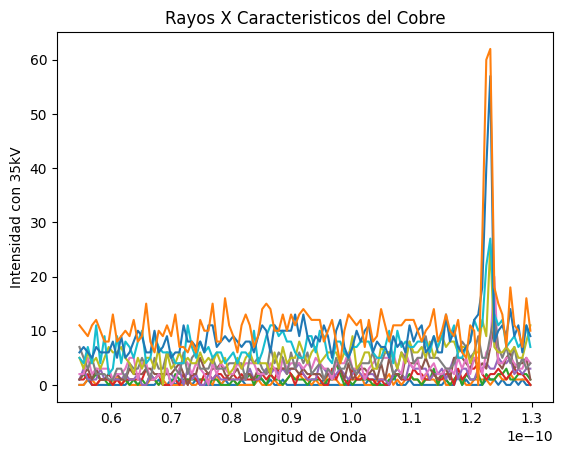

In [8]:
longitudes_de_onda=ley_de_bragg(actividad4['?ngulo del crista'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 13kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 15kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 17kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 19kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 21kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 23kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 25kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 27kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 29kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 31kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 33kV'])
plt.plot(longitudes_de_onda,actividad4['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.show()